In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [3]:
X = np.linspace(1,5,30).reshape((-1,1))
y = np.sin(X).ravel()

In [4]:
sns.set()
colors = sns.color_palette("husl")

In [5]:
noise = np.random.random(30)*0.3-0.15

y_true = y + noise

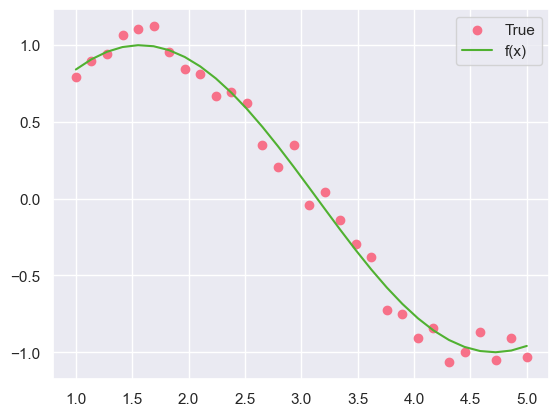

In [6]:
plt.scatter(X,y_true,color=colors[0],label="True")
plt.plot(X,y,color=colors[2],label="f(x)")
plt.legend()

In [7]:
knn = KNeighborsRegressor(weights="distance")
linear = LinearRegression()

In [8]:
knn.fit(X,y_true)
linear.fit(X,y_true)

LinearRegression()

In [9]:
xmin, xmax = X.min()-0.5,X.max()+0.5
X_test = np.linspace(xmin,xmax,30).reshape((-1,1))

In [10]:
y1_ = knn.predict(X_test)
y2_ = linear.predict(X_test)

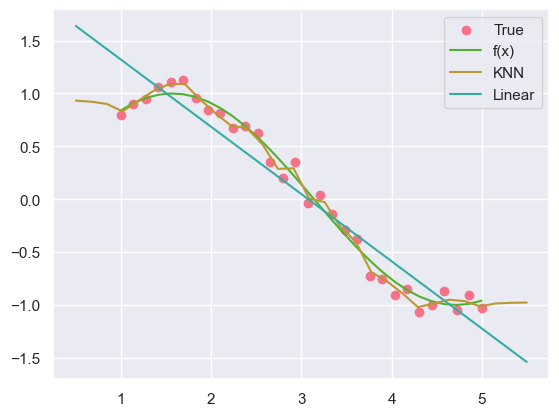

In [11]:
plt.scatter(X,y_true,color=colors[0],label="True")
plt.plot(X,y,color=colors[2],label="f(x)")

plt.plot(X_test,y1_,color=colors[1],label="KNN")
plt.plot(X_test,y2_,color=colors[3],label="Linear")
plt.legend()
plt.show()

In [12]:
# 斜率w y=wx+b
linear.coef_

array([-0.63533934])

In [13]:
# 截距b y=wx+b
linear.intercept_

1.9554997999158532

In [15]:
from sklearn.datasets import load_diabetes

In [17]:
diabetes = load_diabetes()
data = diabetes.data
feature_names = diabetes.feature_names
target = diabetes.target

In [23]:
df = pd.DataFrame(data=data,columns=feature_names)

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


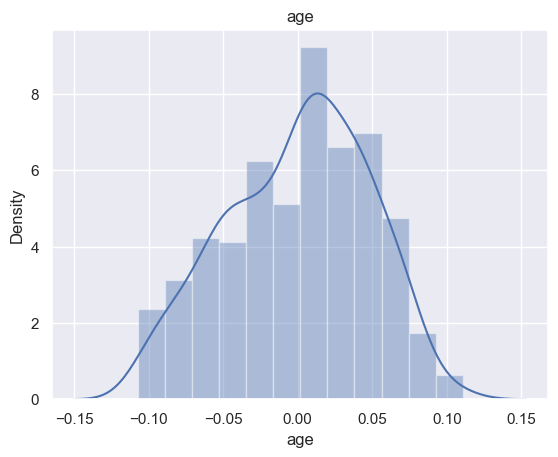

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


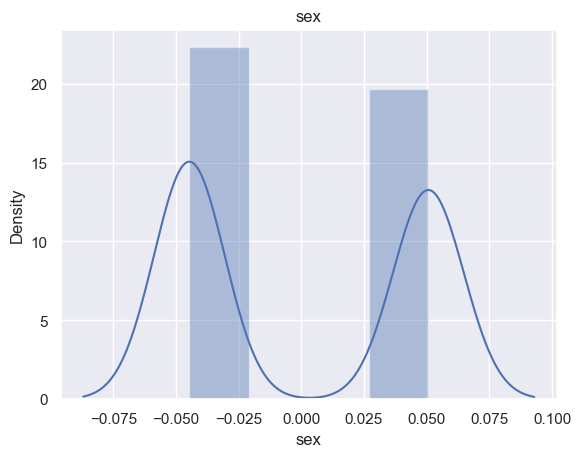

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


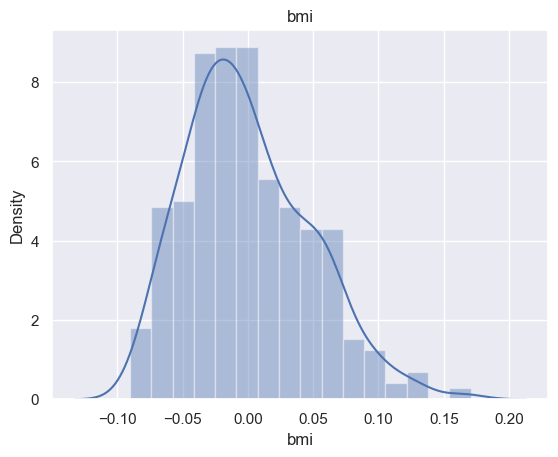

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


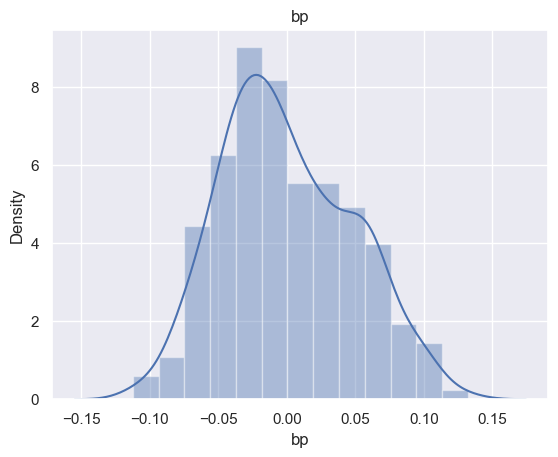

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


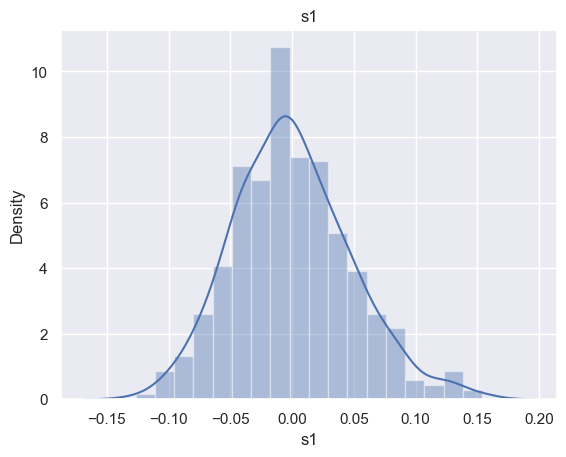

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


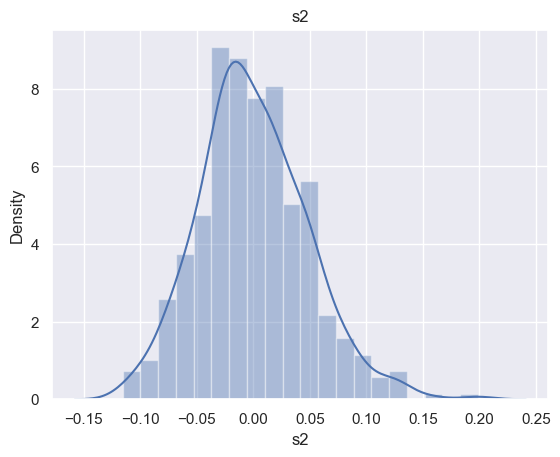

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


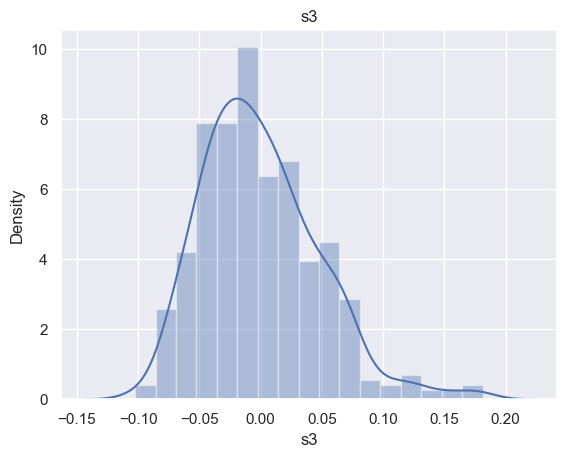

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


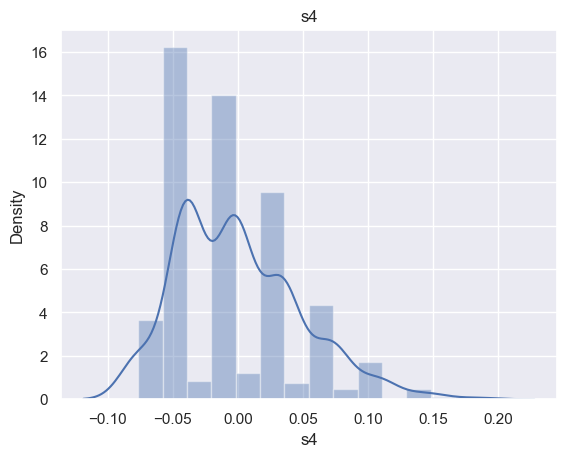

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


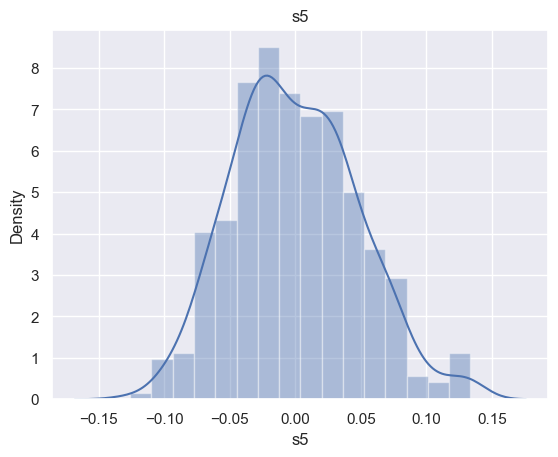

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


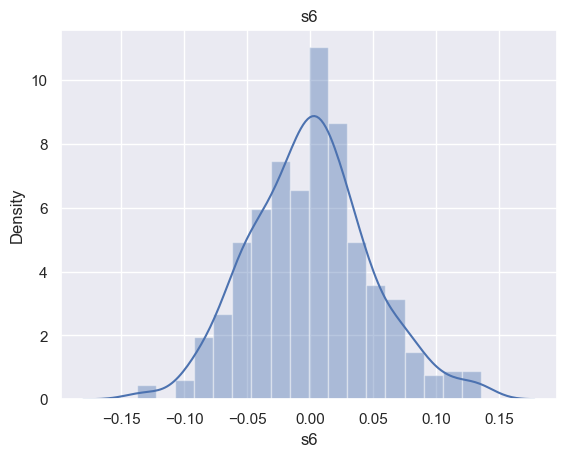

In [24]:
for col in df:
    sns.distplot(df[col])
    plt.title(col)
    plt.show()

### 分析特征与目标的相关度，选择有效特征

In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

Text(0, 0.5, 'target')

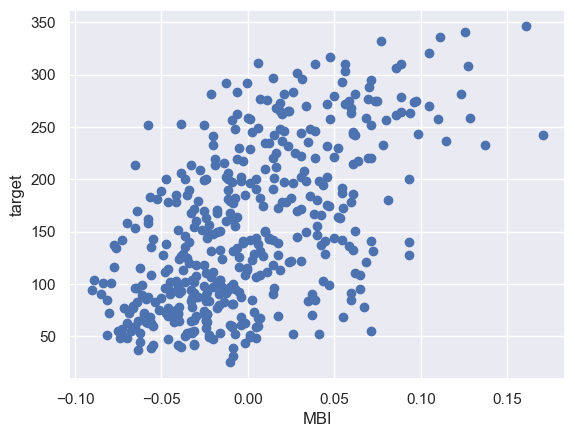

In [27]:
plt.scatter(df.bmi,target)
plt.xlabel("BMI")
plt.ylabel("target")

Text(0, 0.5, 'target')

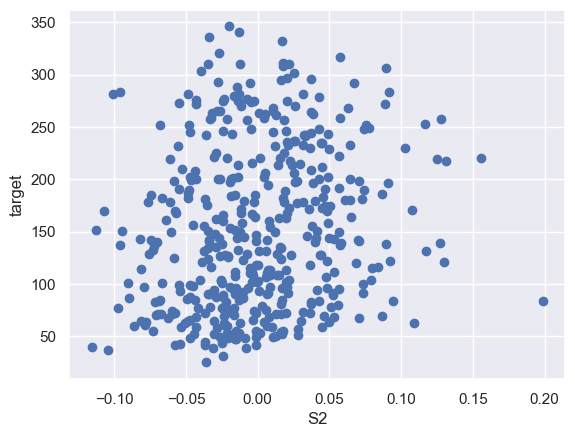

In [28]:
plt.scatter(df.s2,target)
plt.xlabel("S2")
plt.ylabel("target")

In [29]:
leaner = LinearRegression()
linear.fit(df[["bmi"]],target)

LinearRegression()

In [33]:
xmin,xmax = df.bmi.min(),df.bmi.max()
test = np.linspace(xmin,xmax,50).reshape((-1,1))
y_ = linear.predict(test)

/Users/lianke/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


斜率为949.4352603839491


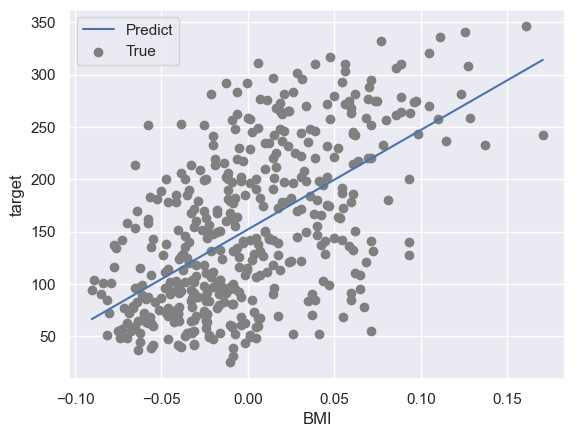

In [39]:
plt.plot(test,y_,label="Predict")
plt.scatter(df.bmi,target,label="True",color="gray")
plt.xlabel("BMI")
plt.ylabel("target")
plt.legend()

print(f"斜率为{linear.coef_[0]}")

plt.show()

### 对所有特征做相关度分析

In [42]:
importances = {}
for col_name in df:
    linear = LinearRegression()
    linear.fit(df[[col_name]],target)
    importances[col_name] = linear.coef_[0]

<AxesSubplot:>

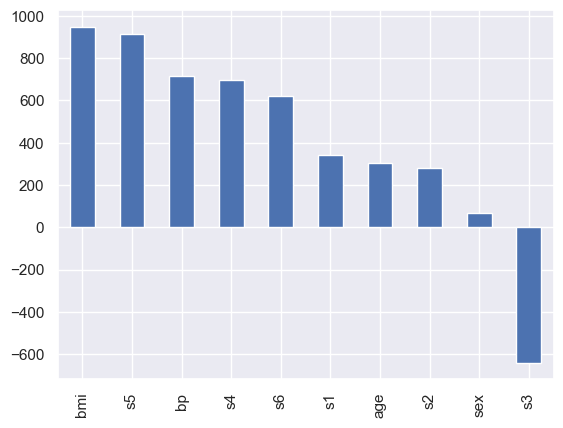

In [43]:
pd.Series(importances).sort_values(ascending=False).plot(kind="bar")

### 特征选择

In [44]:
train = df.drop("sex",axis=1)

### 建模，查看基模型的损失（均方误差MSE）

In [45]:
leaner = LinearRegression()
knn = KNeighborsRegressor()

In [50]:
from sklearn.model_selection import cross_val_predict,cross_val_score
from sklearn.metrics import mean_squared_error

linear_result = cross_val_predict(linear,train,target,cv=5)
linear_mse = mean_squared_error(target,linear_result)

knn_result = cross_val_predict(knn,train,target,cv=5)
knn_mse = mean_squared_error(target,knn_result)

print(f"-均方误差-\nlinear_MSE:{linear_mse}\nknn_MSE{knn_mse}")

-均方误差-
linear_MSE:3089.982363557709
knn_MSE3719.1348416289593


### 模型优化，对KNN调参

In [51]:
def cross_loss(model,train,target,count):
    train_loss_list = []
    test_loss_list = []
    for i in range(count):
        X_train,X_test,y_train,y_test = train_test_split(train,target,test_size=0.2)
        model.fit(X_train,y_train)
        train_loss = mean_squared_error(y_train,model.predict(X_train))
        test_loss = mean_squared_error(y_test,model.predict(X_test))
        train_loss_list.append(train_loss)
        test_loss_list.append(test_loss)
    return np.array(train_loss_list).mean(),np.array(test_loss_list).mean()

In [52]:
def predict_loss(k_list,train,target,count):
    train_list = []
    test_list = []
    for k in k_list:
        model = KNeighborsRegressor(n_neighbors=k)
        train_mean_loss,test_mean_loss = cross_loss(model,train,target,count)
        train_list.append(train_mean_loss)
        test_list.append(test_mean_loss)
        
    return pd.DataFrame(data={
        "train_loss":train_list,
        "test_loss":test_list
    },index=k_list)
    

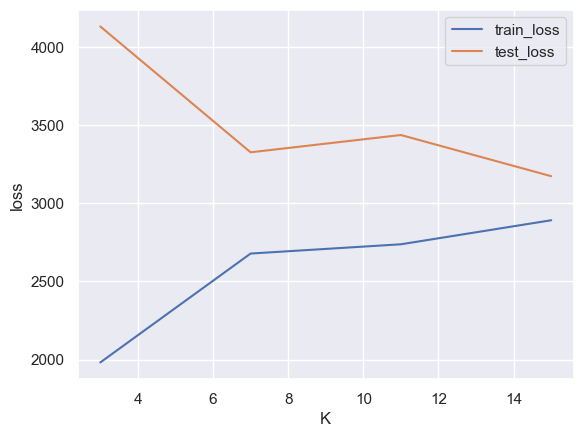

In [54]:
k_list = np.arange(3,np.sqrt(target.shape[0]*0.8),4,dtype="int")
result = predict_loss(k_list,train,target,5)
result.plot()
plt.ylabel("loss")
plt.xlabel("K")
plt.show()

In [55]:
best_knn = KNeighborsRegressor(n_neighbors=19)
y_ = cross_val_predict(best_knn,train,target,cv=5)
mean_squared_error(target,y_)

3335.937397375315